In [24]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import graphviz
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn import tree
from six import StringIO
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## PCA

In [3]:
breast = load_breast_cancer()
print(breast.data.shape)

(569, 30)


In [4]:
df_breast = pd.DataFrame(breast.data, columns=breast.feature_names)
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df_target = pd.DataFrame(breast.target.reshape(-1,1), columns=["target"])
df_target["label_name"] = df_target.target.replace({0: "Benign", 1: "Malignant"})
df_target

,target,label_name
0,0,Benign
1,0,Benign
2,0,Benign
3,0,Benign
4,0,Benign
...,...,...
564,0,Benign
565,0,Benign
566,0,Benign
567,0,Benign


In [ ]:
df_breast = pd.concat()

In [8]:
scaler = StandardScaler()
scaled_breast = scaler.fit_transform(df_breast.values)
print("Scaled data shape:", scaled_breast.shape)
print(scaled_breast[:3])

Scaled data shape: (569, 30)
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.4388966

In [12]:
new_feature_names = ["scaled_" + "_".join(feature.split(" ")) for feature in breast.feature_names]
scaled_df_breast = pd.DataFrame(scaled_breast, columns=new_feature_names)
scaled_df_breast

,scaled_mean_radius,scaled_mean_texture,scaled_mean_perimeter,scaled_mean_area,scaled_mean_smoothness,scaled_mean_compactness,scaled_mean_concavity,scaled_mean_concave_points,scaled_mean_symmetry,scaled_mean_fractal_dimension,...,scaled_worst_radius,scaled_worst_texture,scaled_worst_perimeter,scaled_worst_area,scaled_worst_smoothness,scaled_worst_compactness,scaled_worst_concavity,scaled_worst_concave_points,scaled_worst_symmetry,scaled_worst_fractal_dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [14]:
pca = PCA(n_components=2)
pc_breast = pca.fit_transform(scaled_df_breast)
pc_df_breast = pd.DataFrame(pc_breast, columns=["pc1", "pc2"])
pc_df_breast

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [17]:
print("Explain variance ratio :", pca.explained_variance_ratio_.sum())

Explain variance ratio : 0.6324320765155943


KeyError: 'label_name'

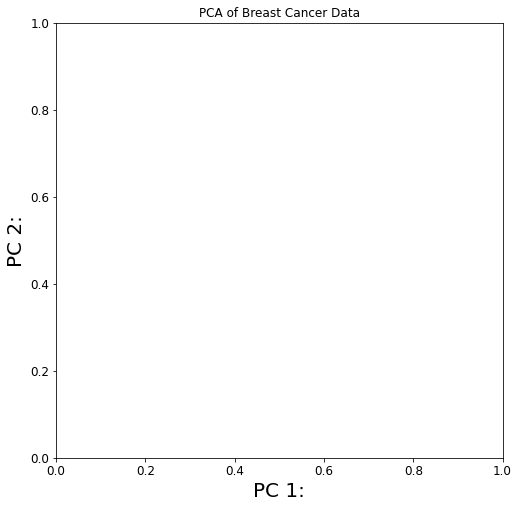

In [16]:
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("PC 1:", fontsize=20)
plt.ylabel("PC 2:", fontsize=20)
plt.title("PCA of Breast Cancer Data")
target_color = [("Benign", "r"), ("Malignant", "c")]
for target, color in target_color:
    list_idx = df_breast["label_name"] == target
    plt.scatter(
        pc_df_breast.loc[list_idx, "pc1"],  pc_df_breast.loc[list_idx, "pc2"],
        c=color, s=50
    )
plt.legend(["Benign", "Malignant"])

In [22]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), 
                    va="bottom", ha="center", fontsize=12
                   )
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398405,-0.157114,-0.877382
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240988,-0.711908,1.106984
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097373,0.024064,0.454270
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1.059564,-1.405442,-1.116988
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263803,0.377708
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596128,-0.035474,0.987927,0.256968
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105210,-0.108645
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341888,0.393913,0.520873
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567937,0.223081,-0.280238,-0.542030,-0.089281


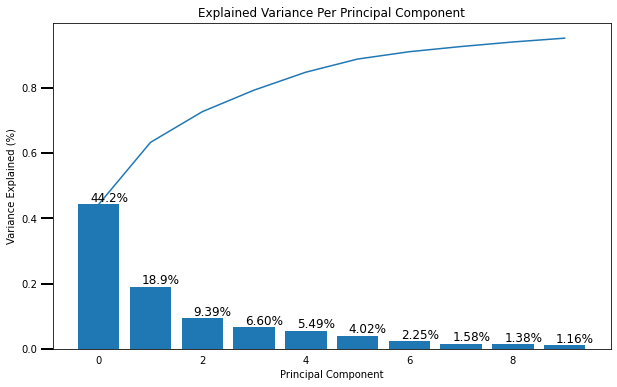

In [23]:
pca = PCA(n_components= 10)
df_pca = pca.fit_transform(scaled_df_breast)
df_pca = pd.DataFrame(
    df_pca,
    columns= [
        "pc" + str(i)
        for i in range(1, pca.n_components+1)
    ]

)
display(df_pca)
scree_plot(pca)

## K-Means

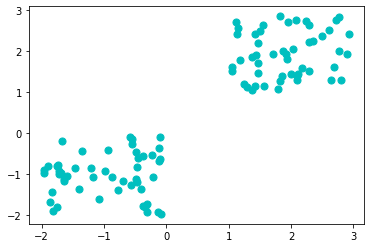

In [26]:
x = -2 * np.random.rand(100, 2)
x1 = 1 + 2*np.random.rand(50, 2)
x[50:100, :] = x1

plt.scatter(x[:, 0], x[:, 1], s=50, c="c")
plt.show()

training ...


C:\Users\Lenovo\anaconda3\envs\hacktiv8-env\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Done training


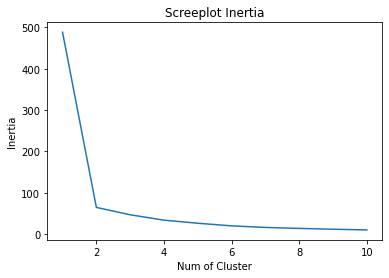

In [31]:
inertia = []

print("training ...")
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
print("Done training")

plt.plot(range(1,11), inertia)
plt.title("Screeplot Inertia")
plt.ylabel("Inertia")
plt.xlabel("Num of Cluster")
plt.show()
    

AttributeError: 'KMeans' object has no attribute 'cluster_center_'

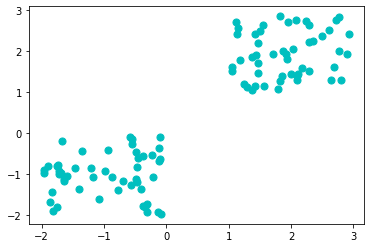

In [33]:
plt.scatter(x[:, 0], x[:, 1], s=50, c="c")
# cluster 1
plt.scatter(
    kmeans.cluster_center_[1, 0],
    kmeans.cluster_center_[1, 1],
    s=200, c="c", marker="o"
)

plt.show()

In [34]:
df = pd.read_csv("data/customer.csv")
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [35]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


training ...


C:\Users\Lenovo\anaconda3\envs\hacktiv8-env\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Done training


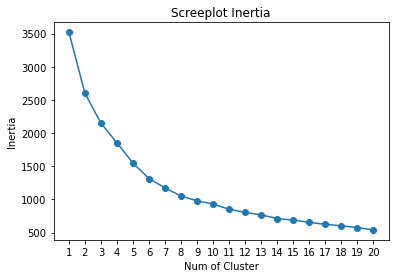

In [37]:
#stadarddize
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

inertia = []

print("training ...")
for k in range (1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_X)
    inertia.append(kmeans.inertia_)
print("Done training")

plt.plot(range(1,21), inertia, "o-")
plt.title("Screeplot Inertia")
plt.ylabel("Inertia")
plt.xlabel("Num of Cluster")
plt.xticks(range(1, 21))
plt.show()

In [43]:
k = 6

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_X)

print(kmeans.inertia_)
print(kmeans.cluster_centers_)

1314.6800280812563
[[-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]
 [ 1.44865163e+00  2.93864819e-03  3.88728973e-01  3.94304862e+00
   4.02164626e+00  3.57841274e-02  4.22611641e+00  9.41635735e-01]
 [-5.90811099e-01 -1.58939862e+00 -1.17369902e-01 -3.50992288e-01
  -4.02741180e-01  1.33513200e-02 -4.22747572e-01 -1.62015752e-01]
 [ 1.44865163e+00  1.63142372e-01 -3.47307951e-01  4.28317250e-01
   6.66702394e-01 -3.55967591e-01  6.92257331e-01  5.10760509e-03]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-5.50800431e-01  3.09580198e-01  1.86860622e+00 -1.26905907e-01
  -2.56963592e-01  1.42079094e+00 -4.18345174e-01  4.02778334e-01]]


In [44]:
df["cluster"] = kmeans.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,5
436,1,3,39228,1431,764,4510,93,2346,5
437,2,3,14531,15488,30243,437,14841,1867,3
438,1,3,10290,1981,2232,1038,168,2125,0


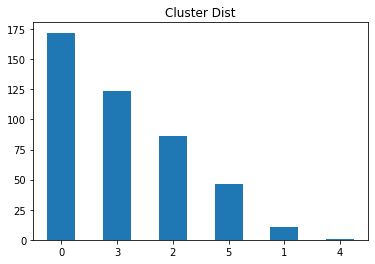

In [48]:
df.cluster.value_counts().plot(kind="bar")
plt.title("Cluster Dist")
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Channel', ylabel='count'>

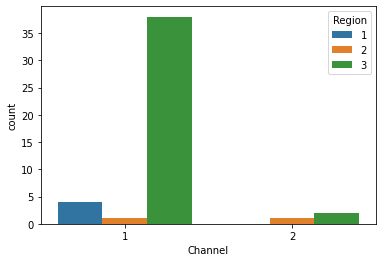

In [51]:
df_cluster_5 = df[df.cluster == 5]
sns.countplot(data=df_cluster_5, x="Channel", hue="Region")